In [83]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# basis vectors in x, y, and t
x=sp.Symbol('x')
y=sp.Symbol('y')
t=sp.Symbol('t')
#model and data amplitudes
Ad=sp.Symbol('A_d')
Am=sp.Symbol('A_m')

# domain width
L=sp.Symbol('L', positive=True, finite=True)
# domain time dinension
T=sp.Symbol('T', positive=True, finite=True)

# data errors:
s=sp.Symbol('\sigma_d')
# data density:
rd=sp.Symbol('rho', positive=True, finite=True)
# wavenumbers in the x, y, and t dimensions
kx=sp.Symbol('k_x', integer=True, positive=True)
ky=sp.Symbol('k_y', integer=True, positive=True)
kt=sp.Symbol('k_t', integer=True, positive=True)
# Weighting on d3z/dx2dt
Wxxt=sp.Symbol('W_{xxt}')
# Weighting on d2x/dt2
Wtt=sp.Symbol('W_{tt}')


In [54]:
tau=sp.Symbol('tau')
lam=sp.Symbol('\lambda')
tau*lam

\lambda*tau

In [55]:
# basis functions:
bf =sp.sin(2*kx*sp.pi*x/L) * sp.sin(2*ky*sp.pi*y/L) * sp.sin(2*kt*sp.pi*t/T) 
# model is the basis function times Am
m=Am * bf
# data is basis function times Ad
d=Ad * bf

In [56]:
# derivatives of the basis functions
D2xtm = sp.diff(sp.diff(sp.diff(m, x),x),t)
D2ytm = sp.diff(sp.diff(sp.diff(m, y),y),t)
Dxytm = sp.diff(sp.diff(sp.diff(m, x),y),t)
D2tm = sp.diff(sp.diff(m, t),t)

In [57]:
# Combined residual:
R=sp.integrate(\
               sp.integrate(\
    sp.integrate( rd*((d-m)/s)**2 + (Wxxt*D2xtm)**2 + (Wxxt*D2ytm)**2 + 2*(Wxxt*Dxytm)**2+(Wtt*D2tm)**2, (x, 0, L)),\
    (y, 0, L)), 
               (t, 0, T))

All of the terms inside the integral have units of $m^{-2} yr^{-1}$, so that R is unitless, so every quantity inside parenthesis has units of $m yr^{-1/2}$. 
- $A_d$ and $A_m$ have units of $m$.
- $\rho_d$ has units of $m^{-2} yr^{-1}$ (points per meter squared per year), so $\rho_d(d-m)/\sigma$ has units of $m^{-2} yr^{-1}$.
- $\partial^3 z / \partial x^2 \partial t$ has units of $m^{-1} yr^{-1}$  
- $W_{xxt}$ has units of $yr^{1/2}$ 
- $\partial^2 z /\partial t^2$ has units of $m yr^{-2}$
- $W_{tt}$ has units of $m^{-2} yr^{3/2}$ 
- $k_x$, $k_y$, and $k_t$ are all unitless


In [76]:
R

2*pi**4*A_m**2*L**2*W_{tt}**2*k_t**4/T**3 + 8*pi**6*A_m**2*W_{xxt}**2*k_t**2*k_x**4/(L**2*T) + 16*pi**6*A_m**2*W_{xxt}**2*k_t**2*k_x**2*k_y**2/(L**2*T) + 8*pi**6*A_m**2*W_{xxt}**2*k_t**2*k_y**4/(L**2*T) + rho*(A_d**2*L**2*T/8 - A_d*A_m*L**2*T/4 + A_m**2*L**2*T/8)/\sigma_d**2

In [58]:
# solve for model amplitude that minimizes the combined residual:
A_best=sp.solve(sp.diff(R, Am), Am)[0]
A_best

A_d*L**4*T**4*rho/(L**4*T**4*rho + 16*pi**4*L**4*W_{tt}**2*\sigma_d**2*k_t**4 + 64*pi**6*T**2*W_{xxt}**2*\sigma_d**2*k_t**2*k_x**4 + 128*pi**6*T**2*W_{xxt}**2*\sigma_d**2*k_t**2*k_x**2*k_y**2 + 64*pi**6*T**2*W_{xxt}**2*\sigma_d**2*k_t**2*k_y**4)

It's not clear how best to simplify this expression, but working by hand gives this expression as equivalent to $A_{best}$

In [49]:
sp.simplify(Ad*rd/s**2 /  (rd/s**2 + 16*sp.pi**4*(Wtt**2*kt**4/T**4 + 4*sp.pi**2*kt**2*Wxxt**2*(kx**2+ky**2)**2/(L**4*T**2))))

A_d*L**4*T**4*rho/(L**4*T**4*rho + 16*pi**4*\sigma_d**2*k_t**2*(L**4*W_{tt}**2*k_t**2 + 4*pi**2*T**2*W_{xxt}**2*(k_x**2 + k_y**2)**2))

...or better yet...

In [77]:
Ad/(1+(16*sp.pi**4*s**2*kt**2/rd)*(Wtt**2*kt**2/T**4 + 4*sp.pi**2*T**2*Wxxt**2*(kx**2+ky**2)**2/(L**4*T**4)))

A_d/(16*pi**4*\sigma_d**2*k_t**2*(W_{tt}**2*k_t**2/T**4 + 4*pi**2*W_{xxt}**2*(k_x**2 + k_y**2)**2/(L**4*T**2))/rho + 1)

Writing this in terms of wavelength ($\lambda= L (k_x^2+k_y^2)^{-2}$) and period ($\tau = T/k_t$), 

In [69]:
Ad/(1+16*sp.pi**4*s**2/rd*(Wtt**2/tau**4 + 4*sp.pi**2*Wxxt**2/(lam**4*tau**2)))

A_d/(16*pi**4*\sigma_d**2*(W_{tt}**2/tau**4 + 4*pi**2*W_{xxt}**2/(\lambda**4*tau**2))/rho + 1)

To choose a value of $W_{tt}$, we look for the wavelength where $A_{best} = A_d/2$, or
$$\frac{16 \pi^4 \sigma_d^2}{\rho_d} \left(\frac{W_{tt}^2}{\tau^4} + \frac{4\pi^2W_{xxt}^2}{\lambda^4\tau^2}\right) =1\,$$


Solving for $W_{tt}$ gives:
$$ \frac{W_{tt}^2}{\tau^4} = \frac{\rho}{16 \pi^4 \sigma_d^2}$$

$$ W_{tt} = \frac{\tau^2\rho^{1/2}}{4 \pi^2 \sigma_d}$$

And solving for $W_{xxt}$ gives:
$$ \frac{4 \pi^2 W_{xxt}^2}{\lambda^4 \tau^2} = \frac{\rho}{16 \pi^4 \sigma_d^2}$$
$$ W_{xxt} = \frac{\rho^{1/2} \lambda^2 \tau}{8 \pi^3 \sigma_d} $$

## In 1D:

In [222]:
# basis functions:
bf1 =sp.sin(2*kx*sp.pi*x/L)  * sp.sin(2*kt*sp.pi*t/T) 
# model is the basis function times Am
m1=Am * bf1
# data is basis function times Ad
d1=Ad * bf1

In [227]:
# derivatives of the basis functions
D2xtm1 = sp.diff(sp.diff(sp.diff(m1, x),x),t)
D2tm1 = sp.diff(sp.diff(m1, t),t)

In [228]:
# Combined residual:
R1=sp.integrate(          
    sp.integrate( rd*((d1-m1)/s)**2 + (Wxxt*D2xtm1)**2 ++(Wtt*D2tm1)**2, \
        (x, 0, L)),\
    (t, 0, T))
R1


4*pi**4*A_m**2*L*W_{tt}**2*k_t**4/T**3 + 16*pi**6*A_m**2*W_{xxt}**2*k_t**2*k_x**4/(L**3*T) + rho*(A_d**2*L*T/4 - A_d*A_m*L*T/2 + A_m**2*L*T/4)/\sigma_d**2

In [229]:
A1_best=sp.solve(sp.diff(R1, Am), Am)[0]
A1_best

A_d*L**4*T**4*rho/(L**4*T**4*rho + 16*pi**4*L**4*W_{tt}**2*\sigma_d**2*k_t**4 + 64*pi**6*T**2*W_{xxt}**2*\sigma_d**2*k_t**2*k_x**4)

Simplifying this (with $\tau = T/k_t$ and $\lambda = L/(k_x^2+k_y^2)^{1/2}$) gives:
$$
\frac{A_{best}}{A_d}=\frac{1}{1+\frac{16\pi^4\sigma_d^2}{\rho}\left(\frac{W_{tt}^2}{\tau^4} + \frac{4\pi^2W_{xxt}^2}{\lambda^4\tau^2}\right)}
$$

Solving for $W_{tt}$ when $A_{best}/A_d=1/2$:

$$
W_{tt} = \frac{\rho^{1/2}\tau^2}{4 \pi \sigma_d}
$$

Solving for $W_{xxt}$:

$$
W_{xxt} = \frac{\rho^{1/2} \lambda^2 \tau}{8 \pi^3 \sigma_d}
$$


### Example cases

#### 1. Balancing systematic errors against temporal smoothing in a high-slope area
We only have one independent bias value every 10 km at Jakobshavn latitude, and per-track systematic errors might be as large as 10 m geolocation error * slope of 0.05 -> sigma of 0.5

In [184]:
tau=0.125  # 1/8 year period
rho_tr=4/10000   # 4 measurements/year/10 km
si=0.5 # 0.5 m error
Wtti = (tau**2*rho_tr**0.5/(4*np.pi**2*si))
print(1/Wtti)

63165.46816697189


With these parameters, the spectrum of attenuation at long wavelength should look like this: 

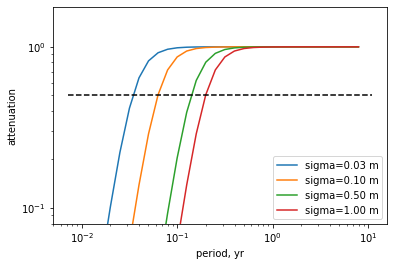

In [190]:
Wtti = 1/50000
tau_0 = 10**np.arange(-2, 1, 0.1)
plt.figure()
for si in [0.03, 0.1, 0.5, 1]:
    atten=1/(1+16*np.pi**4*si**2/rho_tr*(Wtti**2/tau_0**4))
    plt.loglog(tau_0, atten, label=f'sigma={si:0.2f} m' )
plt.gca().set_ylim([10**-1.1, 10**0.25])
plt.plot(plt.gca().get_xlim(), 0.5*np.ones(2), 'k--')
plt.xlabel('period, yr')
plt.ylabel('attenuation')
plt.legend()

#### 2.  Balancing per-ref-point errors against spatio-temporal smoothing in a low-slope environment

In [249]:
# if we want to suppress 1-km scale variations in dh/dt at a temporal scale of 0.125 yr:
lambda_i=1000
tau=0.25
si=0.01
rho_data=4/120 # 4 points/year every 120 m
Wxxti = lambda_i**2*tau*rho_data**0.5/(8*np.pi**3*si)
print(f'solution value:{1/Wxxti:2.2e}, ATL15 value: {0.00003:2.2e}')
#print(0.00003)

solution value:5.43e-05, ATL15 value: 3.00e-05


The spectrum for these plots looks like this:

Text(0, 0.5, 'attenuation')

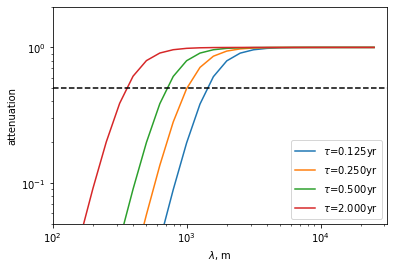

In [246]:
plt.figure();
Wxxti=1/5.4e-5
si=0.01
rho_data=4/120  
lambda_i = 10**np.arange(1., 4.5, 0.1)

for tau_0 in [0.125, 0.25, 0.5,  2]:
    atten=1/(1+16*np.pi**4*si**2/rho_data*(4*np.pi**2*Wxxti**2/(lambda_i**4*tau_0**2)))
    plt.loglog(lambda_i, atten, label=f"$\\tau$={tau_0:2.3f}yr")

plt.gca().set_xlim([100, 10**4.5])
plt.gca().set_ylim([0.05, 2])
plt.plot(plt.gca().get_xlim(), 0.5*np.ones(2), 'k--')

plt.legend()
plt.xlabel('$\lambda$, m')
plt.ylabel('attenuation')
